I made this project by following the CRISP-DM model. Which follows the following steps when creating a model:

**Business Understanding:**

This phase involves understanding the project objectives and requirements from a business perspective.
Tasks include identifying business goals, assessing the situation, determining project objectives, and establishing a project plan. For this project, business understanding is not needed. It is a very simple dataset. 

**Data Understanding:**

In this phase, you acquire and explore the data to understand its structure, content, and quality.
Tasks include collecting data, describing data, exploring data to discover initial insights, and verifying data quality.

**Data Preparation:**

This phase focuses on preparing the data for analysis by cleaning, transforming, and integrating it as necessary.
Tasks include selecting data, cleaning data to handle missing or erroneous values, transforming data into suitable formats, and integrating data from multiple sources.

**Modeling:**

Here, you develop and build predictive or descriptive models based on the prepared data.
Tasks include selecting modeling techniques, building models, and assessing model performance.
Evaluation:

This phase involves evaluating the models to ensure they meet the business objectives and are of sufficient quality.
Tasks include evaluating model performance, reviewing the model with stakeholders, and determining whether the objectives have been achieved.

**Deployment:**
In this instance the model is only used for building the model and my classmates review the model. Im not planning on deploying it. 

# **Data Understanding**


In this file there are details about clients of a company which inclide the ID, the gender, the age of the customer and a salary. The data is about 400 clients. The collected information regards a buying decision, wheter the customer decided to buy specific products or not. 

With this dataset I want to make and train a Naive Bayes model which predicts if the customer decided to buy or not. 

The value we want to predict is: "Target"

The other values are: "User ID", "Gender", "Age", "EstimatedSalary" 

**Importing packages:** 
    This step involves importing libraries such as pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization, plotly for interactive visualizations, and scikit-learn for machine learning algorithms.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

**Importing Dataset:** The dataset is imported using pd.read_csv(). The dataset contains information about 400 clients, including their unique ID, gender, age, estimated salary, and whether they made a purchase.

In [3]:
SalesDF = pd.read_csv('Sales.csv')
print(f"shape: {SalesDF.shape}")
SalesDF.head()

shape: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
SalesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


The information that this gives us is that the only categorical data is Gender. And there seem to be no missing values.


**Summary statistics of numerical features:**
These summary statistics provide valuable insights into the numerical features of the dataset. They help in understanding the central tendency, variability, and distribution of each numerical variable. This understanding is crucial for data preprocessing, identifying outliers, and selecting appropriate feature scaling methods. 

In [5]:
print("\nSummary statistics of numerical features:")
print(SalesDF.describe())
SalesDF.describe(include=[object]).T


Summary statistics of numerical features:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


,count,unique,top,freq
Gender,400,2,Female,204


From this summary we can conclude that the minimum age is 18 and the maximum age is 60. The number of Females and Males is almost the same in this dataset. The range of the User ID, Age, EstimatedSalary are very different from eachother. While standardization may not be critical for Naive Bayes models, especially for binary features like User ID and Purchased, it can still be beneficial for improving algorithm convergence, performance, and interpretability, particularly when dealing with features on different scales like Age and Estimated Salary.

**Histograms to give more insights**

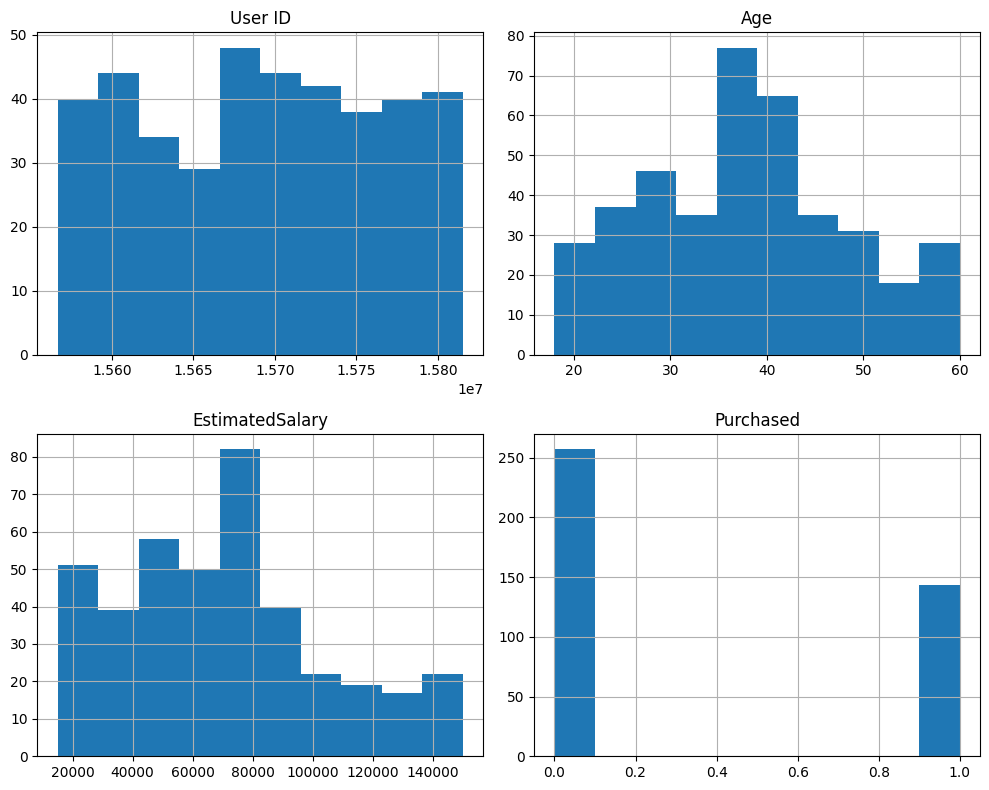

In [6]:
# Histograms of numerical features
SalesDF.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



# **Data Preparation** 

The first thing I did when preparating the data was remove the User ID. Because we don't need it to build the model. After that I converted the categorical features to numerical features. The only categorical feature in this dataset is Gender. 

After the conversion, Male = 0 and Female = 1


In [7]:
SalesDF.drop('User ID', axis=1, inplace=True)
SalesDF

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
SalesDF['Gender'] = SalesDF['Gender'].replace(['Male', 'Female'], [0, 1])
SalesDF

/tmp/ipykernel_1436/2808732482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SalesDF['Gender'] = SalesDF['Gender'].replace(['Male', 'Female'], [0, 1])


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# **Modeling and Evaluation**

Now that we have our prepared dataset we're gonna be working on the Naive Bayes model. For this model we use the following dataset.
In this part of the CRISP-DM Model I'm gonna provide code for training, evaluating, and visualizing Multinomial Naive Bayes models in a machine learning context. It includes functions for plotting confusion matrices, performing cross-validation, finding fold indices, plotting evaluation results, and modeling with Multinomial Naive Bayes. The primary focus is on assessing model performance through various metrics and visualizations.

In [9]:
SalesDF

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


**Standardizing**
As mentioned earlier in this document. There are different types of information in this dataset, like ages and salaries. We're using a method called Multinomial Naive Bayes to understand this data. Because the numbers in the data cover a wide range, we have to standardize them to make sure they're all on a similar scale before we can analyze them accurately.

In [10]:
# standardize EstimatedSalary and Age with StandardScaler
StandSalesDF = SalesDF.copy()
scaler = MinMaxScaler(feature_range=(18,60)).fit(SalesDF[['EstimatedSalary']])
StandSalesDF['EstimatedSalary'] = scaler.transform(StandSalesDF['EstimatedSalary'].values.reshape(-1,1))
StandSalesDF

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Gender,Age,EstimatedSalary,Purchased
0,0,19,19.244444,0
1,0,35,19.555556,0
2,1,26,26.711111,0
3,1,27,31.066667,0
4,0,19,36.977778,0
...,...,...,...,...
395,1,46,26.088889,1
396,0,51,20.488889,1
397,1,50,19.555556,1
398,0,36,23.600000,0


**Separation** 
As the next step, I seperated the data into features (X) and target variables (Y), this way we allow the machine learning algorithm to learn the relationship between these two during the training process.The algorithm analyzes how changes in the features affect the target variable and uses this information to make predictions or classifications on new, unseen data.

In [11]:
x = np.asanyarray(StandSalesDF.drop('Purchased', axis=1))
y = StandSalesDF.Purchased.values.reshape(-1,1)

**Training and visualization**

In [12]:
#Creating header
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'orange'}

FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

#This function is responsible for plotting the confusion matrix. It takes a confusion matrix (cm) and a dictionary of classes as input. 
#The confusion matrix is plotted as an image with text annotations representing the counts in each cell.

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

#This function performs cross-validation using the cross_val_score function from scikit-learn. 
#It prints the mean cross-validation score and the individual cross-validation scores for each fold.

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

#This function prints the indices of the training and test data for each fold in a k-fold cross-validation.

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

#This function is responsible for plotting the evaluation results of the models. 
#It creates a figure with two subplots: one for model evaluation results (accuracy, recall, precision, F1 score) and another for model accuracy results for both train and test sets.

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models 
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}), 
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model evaluation
    ax[1].set_title('Model Accuracy Results for train and test', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}), 
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()
# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1 ):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")
    


    # define model and fit model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_test[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_proba_test[:,0])
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return clf, acc_test, acc_train

**Creating the model**

-------------------- Shape --------------------
x_train: (320, 3)
y_train: (320, 1)
x_test: (80, 3)
y_test: (80, 1)


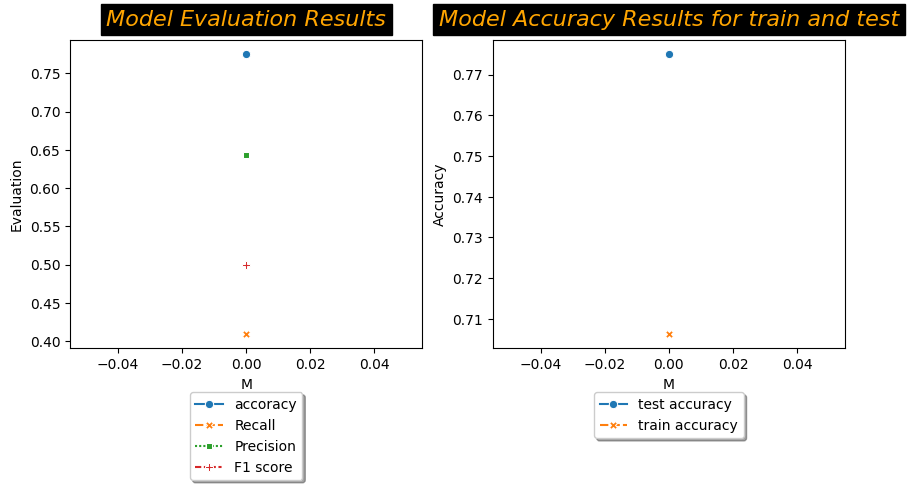

-------------------- Confusion Matrix --------------------
[[53  5]
 [13  9]]


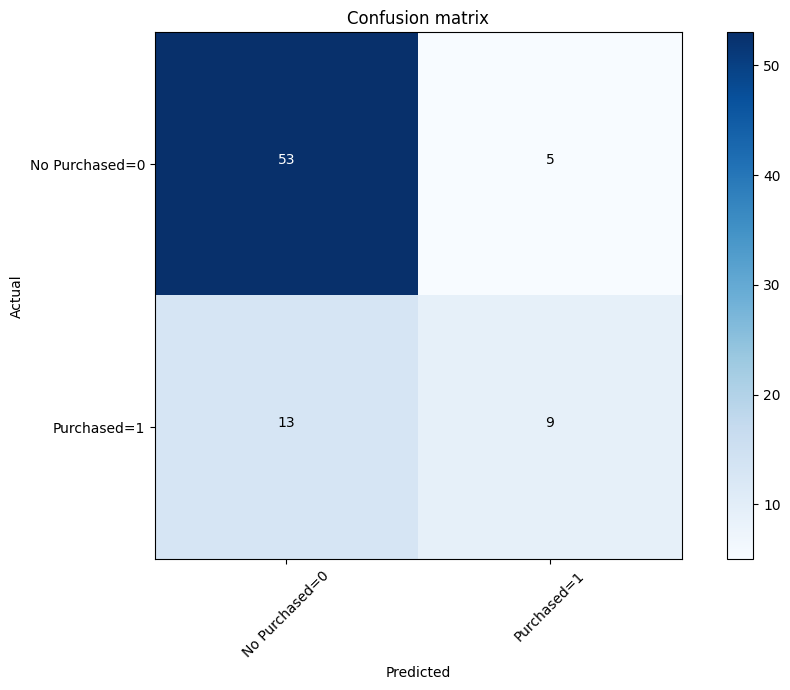

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.80      0.91      0.85        58
   Purchased=1       0.64      0.41      0.50        22

      accuracy                           0.78        80
     macro avg       0.72      0.66      0.68        80
  weighted avg       0.76      0.78      0.76        80
 

Jaccard Score: 0.3333333333333333 



In [13]:

clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Purchased=0', 'Purchased=1'])

**Evaluation** 
The Naive Bayes model achieved an overall accuracy of 78%. It performs relatively well in predicting instances labeled 'No Purchased=0', with high precision (80%) and recall (91%). However, its performance is less satisfactory for instances labeled 'Purchased=1', with lower precision (64%) and recall (41%). The F1-score, which balances precision and recall, is higher for 'No Purchased=0' (85%) compared to 'Purchased=1' (50%). These results indicate potential areas for improvement in accurately predicting instances where customers made a purchase.

# **Model review**

**Data Understanding:** 
We have checked if data was understood. The data frame is filtered to see the amount of rows and columns, also with he describe() function the min, max, means and std's are rendered. This is done correctly, for example to see outliers. There is a plot generated to see the outliers, this was done by a histogram. Maybe if there was generated a scatter plot matrix the outliers were better visible if there were any.  
 
**Data Preparation:**
The categorical variable 'Gender' was converted to a numerical variable correctly and unneeded columns were dropped. The data standardization was done in the next part, Modeling and Evaluation, this also could be done in Data Preparation part. 
 
**Modeling and Evaluation**
The model is divided in functions nicely. The model accuracy results for the train and test set are plotted, together with the results. The results and confusion matrix are looking good for the NB-model that is created. To see the overall performance of the model, other models can be done with the dataset to validate the outcome.